# Amperon Data Engineering Take Home Assignment

In [24]:
!pip install sqlalchemy psycopg2-binary pandas matplotlib


In [25]:
import psycopg2

In [26]:
import os

In [27]:
from sqlalchemy import create_engine, text

In [28]:
import pandas as pd

In [29]:
import matplotlib.pyplot as plt

In [30]:
# do we have access to env variables?
os.getenv("PGHOST")

'postgres'

In [31]:
pd.options.display.float_format = "{:,.4f}".format

In [32]:
# basic test to make sure things work
db_host = os.getenv('PGHOST')
db_port = os.getenv('PGPORT')
db_name = os.getenv('PGDATABASE')
db_user = os.getenv('PGUSER')
db_password = os.getenv('PGPASSWORD')

engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

query = text("SELECT * FROM raw_weather_data LIMIT 10;")

raw_weather_data_df = pd.read_sql_query(query, con=engine)
raw_weather_data_df


,id,latitude,longitude,request_timestamp,time,temperature,wind_speed
0,2,25.8600,-97.4200,2024-05-31 19:32:44.904383+00:00,2024-05-30 20:00:00+00:00,93.4300,17.2000
1,3,25.8600,-97.4200,2024-05-31 19:32:44.904383+00:00,2024-05-30 21:00:00+00:00,92.0800,17.0600
2,4,25.8600,-97.4200,2024-05-31 19:32:44.904383+00:00,2024-05-30 22:00:00+00:00,90.5000,16.5000
3,5,25.8600,-97.4200,2024-05-31 19:32:44.904383+00:00,2024-05-30 23:00:00+00:00,88.4800,16.5000
4,6,25.8600,-97.4200,2024-05-31 19:32:44.904383+00:00,2024-05-31 00:00:00+00:00,85.1000,17.2000
5,7,25.8600,-97.4200,2024-05-31 19:32:44.904383+00:00,2024-05-31 01:00:00+00:00,83.0800,16.0800
6,8,25.8600,-97.4200,2024-05-31 19:32:44.904383+00:00,2024-05-31 02:00:00+00:00,82.7400,13.4200
7,9,25.8600,-97.4200,2024-05-31 19:32:44.904383+00:00,2024-05-31 03:00:00+00:00,81.7200,12.3000
8,10,25.8600,-97.4200,2024-05-31 19:32:44.904383+00:00,2024-05-31 04:00:00+00:00,81.1600,12.5800
9,11,25.8600,-97.4200,2024-05-31 19:32:44.904383+00:00,2024-05-31 05:00:00+00:00,81.1600,12.0200


In [33]:
# connection works and raw data is present, lets see if the view for getting the latest weather data for a locations works

In [34]:
latest_weather_df = pd.read_sql_query("""
    SELECT * FROM latest_weather_conditions
                  """, con=engine)
latest_weather_df

,latitude,longitude,temperature,wind_speed,time,request_timestamp
0,25.8600,-97.4200,91.0600,18.7300,2024-05-31 19:00:00+00:00,2024-05-31 19:32:44.904383+00:00
1,25.9000,-97.5200,93.2000,16.7800,2024-05-31 19:00:00+00:00,2024-05-31 19:32:45.167692+00:00
2,25.9000,-97.4800,92.5300,16.7800,2024-05-31 19:00:00+00:00,2024-05-31 19:32:45.336319+00:00
3,25.9000,-97.4400,92.0800,17.6200,2024-05-31 19:00:00+00:00,2024-05-31 19:32:45.529343+00:00
4,25.9000,-97.4000,91.7400,19.2900,2024-05-31 19:00:00+00:00,2024-05-31 19:32:49.016244+00:00
5,25.9200,-97.3800,91.9600,19.0100,2024-05-31 19:00:00+00:00,2024-05-31 19:32:49.180788+00:00
6,25.9400,-97.5400,93.7600,17.0600,2024-05-31 19:00:00+00:00,2024-05-31 19:32:49.351162+00:00
7,25.9400,-97.5200,93.5400,16.5000,2024-05-31 19:00:00+00:00,2024-05-31 19:32:52.684423+00:00
8,25.9400,-97.4800,93.2000,16.3600,2024-05-31 19:00:00+00:00,2024-05-31 19:32:52.851715+00:00
9,25.9400,-97.4400,92.8600,17.0600,2024-05-31 19:00:00+00:00,2024-05-31 19:32:53.021171+00:00


In [35]:
# great, latest weather conditions are working

In [36]:
# lets get 1 day in the past to 5 days in the future of temp and wind_speed measurements of a lat/long using get_time_series()

In [37]:
weather_time_series_df1 = pd.read_sql_query("SELECT * FROM get_time_series(25.9000, -97.5200)", con=engine)
weather_time_series_df1

,latitude,longitude,time,temperature,wind_speed
0,25.9000,-97.5200,2024-05-30 20:00:00+00:00,96.1300,15.6600
1,25.9000,-97.5200,2024-05-30 21:00:00+00:00,95.2300,15.9400
2,25.9000,-97.5200,2024-05-30 22:00:00+00:00,93.5400,14.8200
3,25.9000,-97.5200,2024-05-30 23:00:00+00:00,91.0600,14.8200
4,25.9000,-97.5200,2024-05-31 00:00:00+00:00,87.1300,15.6600
...,...,...,...,...,...
139,25.9000,-97.5200,2024-06-05 15:00:00+00:00,89.7500,18.4800
140,25.9000,-97.5200,2024-06-05 16:00:00+00:00,91.5300,18.4900
141,25.9000,-97.5200,2024-06-05 17:00:00+00:00,93.3000,18.5100
142,25.9000,-97.5200,2024-06-05 18:00:00+00:00,95.0800,18.5300


In [38]:
# great both latest weather and time  series seem to be working properly

In [39]:
# lets visualize these datasets

In [40]:
# first lets show how those two's temperature history/forecast change over time

In [41]:
# query for another time series
weather_time_series_df2 = pd.read_sql_query("SELECT * FROM get_time_series(25.8600, -97.4200)", con=engine)
weather_time_series_df2

,latitude,longitude,time,temperature,wind_speed
0,25.8600,-97.4200,2024-05-30 20:00:00+00:00,93.4300,17.2000
1,25.8600,-97.4200,2024-05-30 21:00:00+00:00,92.0800,17.0600
2,25.8600,-97.4200,2024-05-30 22:00:00+00:00,90.5000,16.5000
3,25.8600,-97.4200,2024-05-30 23:00:00+00:00,88.4800,16.5000
4,25.8600,-97.4200,2024-05-31 00:00:00+00:00,85.1000,17.2000
...,...,...,...,...,...
139,25.8600,-97.4200,2024-06-05 15:00:00+00:00,88.9200,18.9200
140,25.8600,-97.4200,2024-06-05 16:00:00+00:00,90.4200,18.9200
141,25.8600,-97.4200,2024-06-05 17:00:00+00:00,91.9200,18.9300
142,25.8600,-97.4200,2024-06-05 18:00:00+00:00,93.4100,18.9400


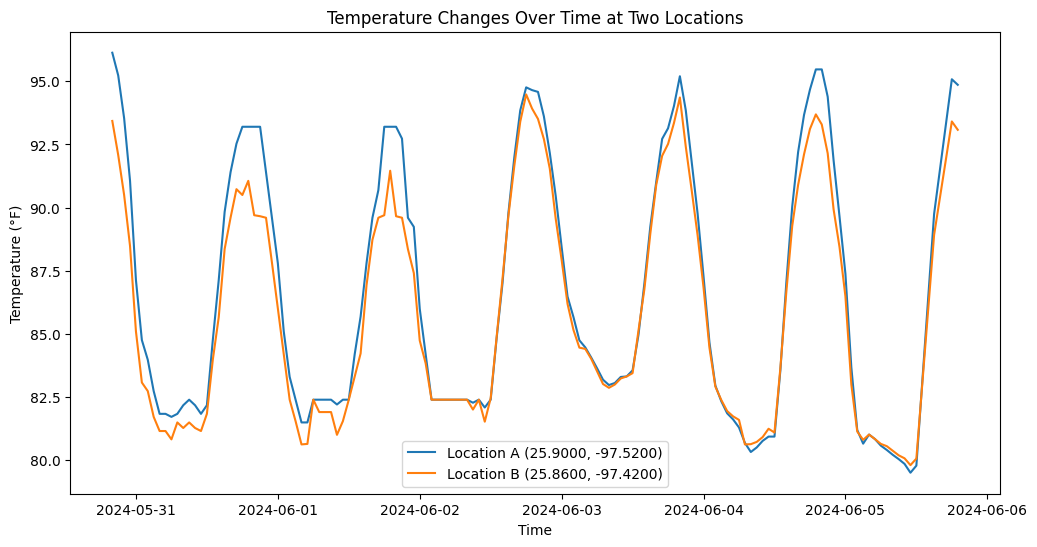

In [42]:
plt.figure(figsize=(12, 6))

# Plot for the first location
plt.plot(weather_time_series_df1['time'], weather_time_series_df1['temperature'], label='Location A (25.9000, -97.5200)')

# Plot for the second location
plt.plot(weather_time_series_df2['time'], weather_time_series_df2['temperature'], label='Location B (25.8600, -97.4200)')

# Add titles and labels
plt.title('Temperature Changes Over Time at Two Locations')
plt.xlabel('Time')
plt.ylabel('Temperature (°F)')
plt.legend()

# Show the plot
plt.show()

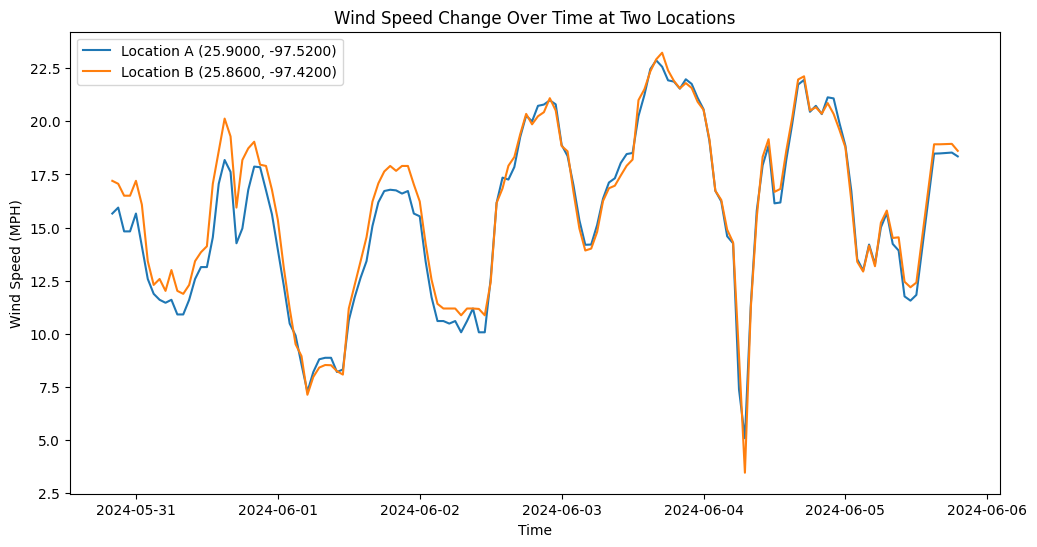

In [43]:
plt.figure(figsize=(12, 6))

# Plot for the first location
plt.plot(weather_time_series_df1['time'], weather_time_series_df1['wind_speed'], label='Location A (25.9000, -97.5200)')

# Plot for the second location
plt.plot(weather_time_series_df2['time'], weather_time_series_df2['wind_speed'], label='Location B (25.8600, -97.4200)')

# Add titles and labels
plt.title('Wind Speed Change Over Time at Two Locations')
plt.xlabel('Time')
plt.ylabel('Wind Speed (MPH)')
plt.legend()

# Show the plot
plt.show()

In [44]:
#lets create a bar chart to compare the latest temperature for two locations

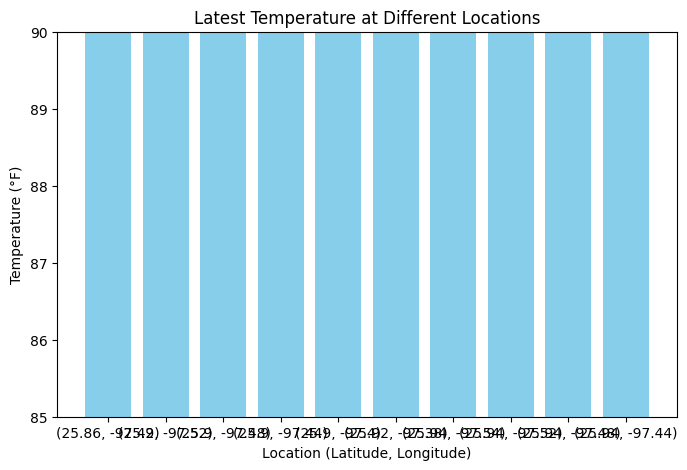

In [45]:
plt.figure(figsize=(8, 5))

# Create labels based on latitude and longitude
locations = [f"({lat}, {lon})" for lat, lon in zip(latest_weather_df['latitude'], latest_weather_df['longitude'])]

# Plot the bar chart
plt.bar(locations, latest_weather_df['temperature'], color='skyblue')

# Add titles and labels
plt.title('Latest Temperature at Different Locations')
plt.xlabel('Location (Latitude, Longitude)')
plt.ylabel('Temperature (°F)')
plt.ylim(85, 90)

# Show the plot
plt.show()
